<a href="https://colab.research.google.com/github/hanna-joo/project/blob/master/Consumption_Trends_2020/EDA/02_corona_mcorp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 모듈 설치하기

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144618 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. 코로나 확진자 데이터 전처리
- 코로나 일별 확진자 데이터 만들기

In [33]:
mcorp = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/Mcorp_all.csv', encoding='utf8')

In [47]:
corona = pd.read_excel('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/코로나확진자/Covid19InfState.xlsx')
corona = corona[['stateDt','decideCnt']]

In [48]:
# 날짜 중복값 처리
corona['stateDt'] = corona['stateDt'].astype('str')
corona = corona.drop_duplicates(['stateDt'], keep='last').reset_index()

# 결측치 처리
corona['stateDt'][0] = 20200201
corona.decideCnt.iloc[0] = 0.0
corona.decideCnt.iloc[3] = 15.0
corona[235:240]

corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      238 non-null    int64  
 1   stateDt    238 non-null    object 
 2   decideCnt  238 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [49]:
# 일별확진자 수 구하기
corona['subs'] = 0
for i in range(len(corona)):
  try:
    corona['subs'][i] =  corona['decideCnt'][i+1] - corona['decideCnt'][i]
  except:
    corona['subs'][i] = 61   # 9/25일 일별확진자 수는 네이버에서 가져옴
corona.drop('index',axis=1, inplace=True)
corona.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,stateDt,decideCnt,subs
0,20200201,0.0,2
1,20200202,2.0,13
2,20200203,15.0,0
3,20200204,15.0,4
4,20200205,19.0,4


In [41]:
# # 일별 확진자 수 구하기
# before = 0
# corona['subs'] = 0
# for i, x  in enumerate(corona.decideCnt):
#   corona['subs'][i] = x-before
#   before = x
# corona.drop('index',axis=1, inplace=True)
# corona.head()

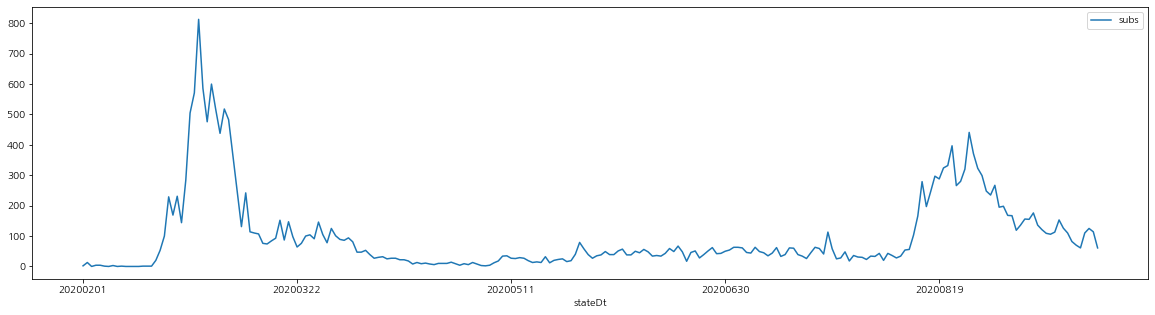

In [50]:
plt.rcParams['figure.figsize'] = (20,5)
corona.plot(x='stateDt', y='subs')
plt.show()

## 2. 온라인쇼핑 + 코로나확진자 시각화
- mcorp + corona

### 2.1. Bar + Line (막대+선)

In [51]:
mcorp = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/Mcorp_all.csv', encoding='utf8')

In [44]:
mcorp.columns

Index(['구매날짜', '카테고리명', '고객성별', '고객나이', 'OS유형', '구매금액', '구매수'], dtype='object')

In [45]:
corona.columns

Index(['index', 'stateDt', 'decideCnt', 'subs'], dtype='object')

In [52]:
corona.columns=['구매날짜','누적확진자','일일확진자']

In [53]:
categories_all = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/04_kdx/data_in/Mcorporation/KDX_CONTEST_파일정의서.xlsx')['xlsx 파일 이름'].values
categories_all = list(categories_all)
categories_all[:5]

['PC사무기기', 'TV홈시어터', '가공식품', '가방지갑잡화', '건강식품']

In [54]:
def categorical_cnt(category='category',sdate=20200101, edate=20201231):
  df = pd.DataFrame(mcorp[mcorp['카테고리명']==category].groupby(['구매날짜'])['구매수'].sum())
  df = df[df.index >= sdate]
  df = df[df.index <= edate]
  df.index = df.index.astype('str')
  return df

In [55]:
def categorical_won(category='category',sdate=20200101, edate=20201231):
  df = pd.DataFrame(mcorp[mcorp['카테고리명']==category].groupby(['구매날짜'])['구매금액'].sum())
  df = df[df.index >= sdate]
  df = df[df.index <= edate]
  df.index = df.index.astype('str')
  return df

In [56]:
def corona_cnt(sdate=20200101, edate=20201231):
  df_corona = corona[['구매날짜','일일확진자']]
  df_corona.구매날짜 = df_corona.구매날짜.astype('int64')
  df_corona = df_corona[df_corona.구매날짜 >= sdate]
  df_corona = df_corona[df_corona.구매날짜 <= edate]
  df_corona.구매날짜 = df_corona.구매날짜.astype('str')
  return df_corona

In [57]:
sday = 20200201
eday = 20200401
step = 7
category = '신발'
def corona_mcorp_plot(category='신발', sday=20200201, eday=20200401, step=7):
  from scipy import stats
  df = categorical_cnt(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  corr = stats.pearsonr(df_new.구매수, df_new.일일확진자)

  if corr[1] < 0.05:
    print("*"*50)
    print(category+" 상관관계: ", corr)
    xtic = np.arange(0,len(df_new.구매날짜),step=step)  # 인터벌 생성
    xdays = [df_new.구매날짜[i] for i in xtic]

    plt.rcParams["figure.figsize"]=(24,6)
    fig, ax1 = plt.subplots()

    df_new['구매수'].plot(kind='bar', color='olivedrab',ax=ax1)
    ax1.set_ylabel(category + " 구매건수")

    ax2  = ax1.twinx()
    ax2.set_ylabel("확진자수")
    df_new['일일확진자'].plot(color='firebrick', ax=ax2, linewidth=5)

    plt.xticks(xtic)
    ax1.set_xticklabels(xdays, rotation=45)

    plt.title(category + " 구매건수와 일일확진자")
    fig.tight_layout()
    plt.legend()
    plt.show()
    return corr

In [58]:
def corona_mcorp_plot_won(category='신발', sday=20200201, eday=20200401, step=7):
  from scipy import stats
  df = categorical_won(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  corr = stats.pearsonr(df_new.구매금액, df_new.일일확진자)
  print("*"*50)
  print(category+" 상관관계: ", corr)
  xtic = np.arange(0,len(df_new.구매날짜),step=step)  # 인터벌 생성
  xdays = [df_new.구매날짜[i] for i in xtic]

  plt.rcParams["figure.figsize"]=(24,6)
  fig, ax1 = plt.subplots()

  df_new['구매금액'].plot(kind='bar', color='darkgrey',ax=ax1)
  ax1.set_ylabel(category + " 구매금액")

  ax2  = ax1.twinx()
  ax2.set_ylabel("확진자수")
  df_new['일일확진자'].plot(color='firebrick', ax=ax2, linewidth=5)

  plt.xticks(xtic)
  ax1.set_xticklabels(xdays, rotation=45)

  plt.title(category + " 구매금액과 일일확진자")
  fig.tight_layout()
  plt.legend()
  plt.show()
  return corr

In [35]:
mcorp.카테고리명.unique()

array(['PC사무기기', 'TV홈시어터', '가공식품', '가방지갑잡화', '건강식품', '골프용품', '공구류', '구기',
       '기타 스포츠', '낚시', '남성의류', '계절가전', '노트북', '농축수산물', '도서음반', '등산용품',
       '메이크업', '문구사무용품', '미용가전', '반려동물', '생활용품', '생활가구', '생활가전', '서비스티켓',
       '성인용품', '세탁청소세면', '수납용품', '수납가구', '수영', '스키보드', '스킨케어', '스포츠의류',
       '신발', '악세서리시계주얼리', '안전용품', '언더웨어', '업소위생용품', '여성의류', '국내외여행',
       '완구키덜트게임', '욕실용품', '욕실가전', '유아용품', '유아패션', '음료', '음향가전', '인테리어용품',
       '자동차용품', '자전거사이클보드인라인', '주방가전', '주방수납잡화', '주방식기용기', '주방조리기구',
       '출산임부용품', '취미악기', '침실가구', '침실인테리어', '카메라캠코더', '캠핑용품', '테마의류',
       '헤어바디용품', '헬스기구용품', '건강관련용품', '휴대폰악세서리'], dtype=object)

In [ ]:
가공식품(+)
건강식품(+)
기타스포츠(+)
남성의류(+)
계절가전(+)
농축수산물(+)
생활용품(+)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
가공식품 상관관계:  (0.5271466915521582, 1.5096339570388134e-05)


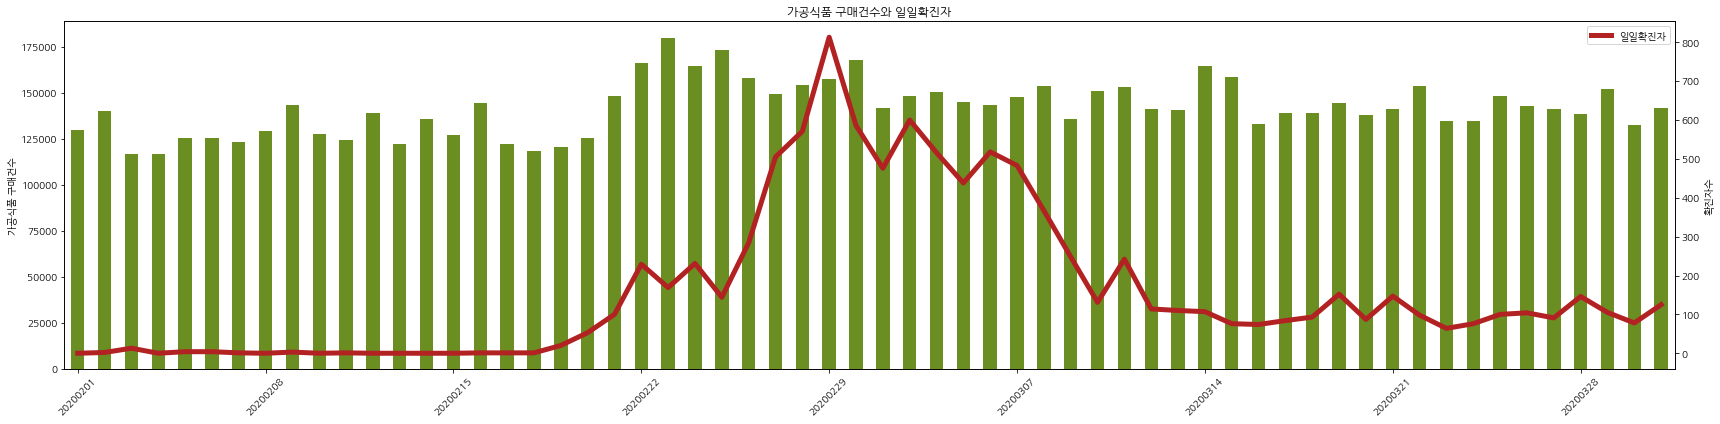

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
가공식품 상관관계:  (0.5130856141441652, 2.7667302019996077e-05)


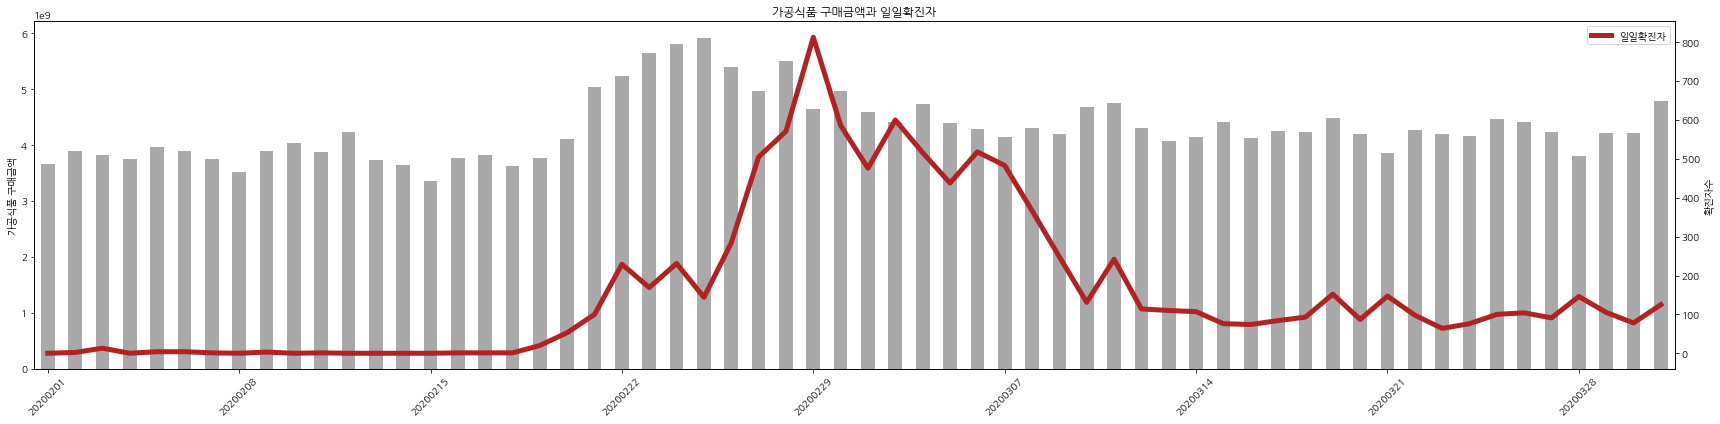

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
건강식품 상관관계:  (0.4568823856959936, 0.0002430163713223264)


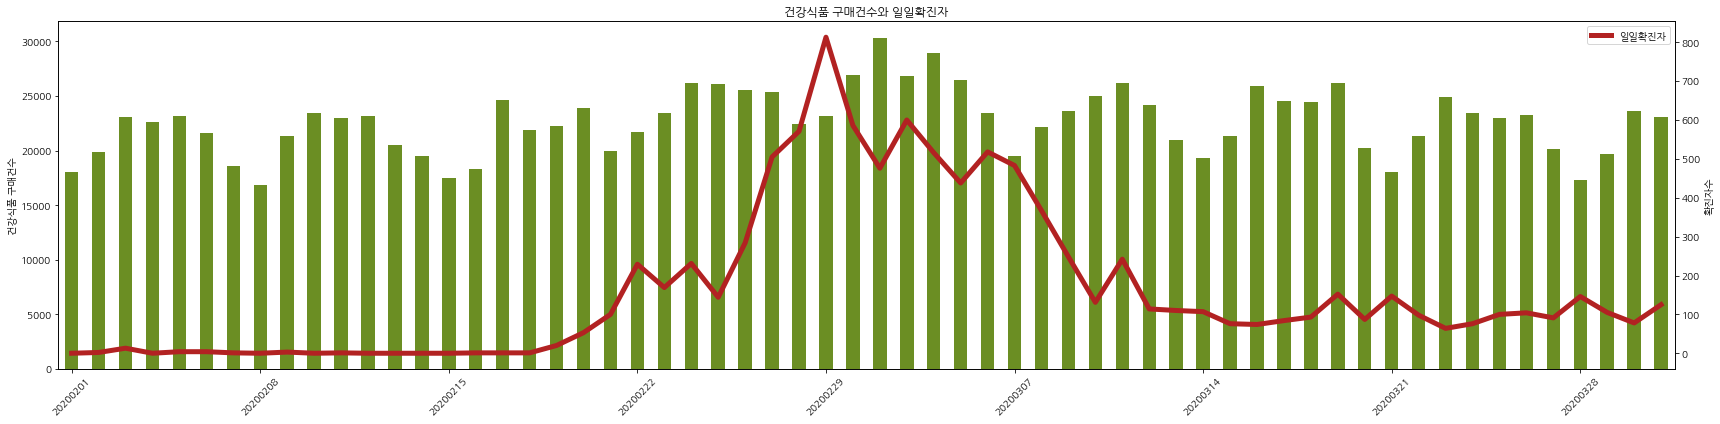

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
건강식품 상관관계:  (0.5180906927817923, 2.236919034810777e-05)


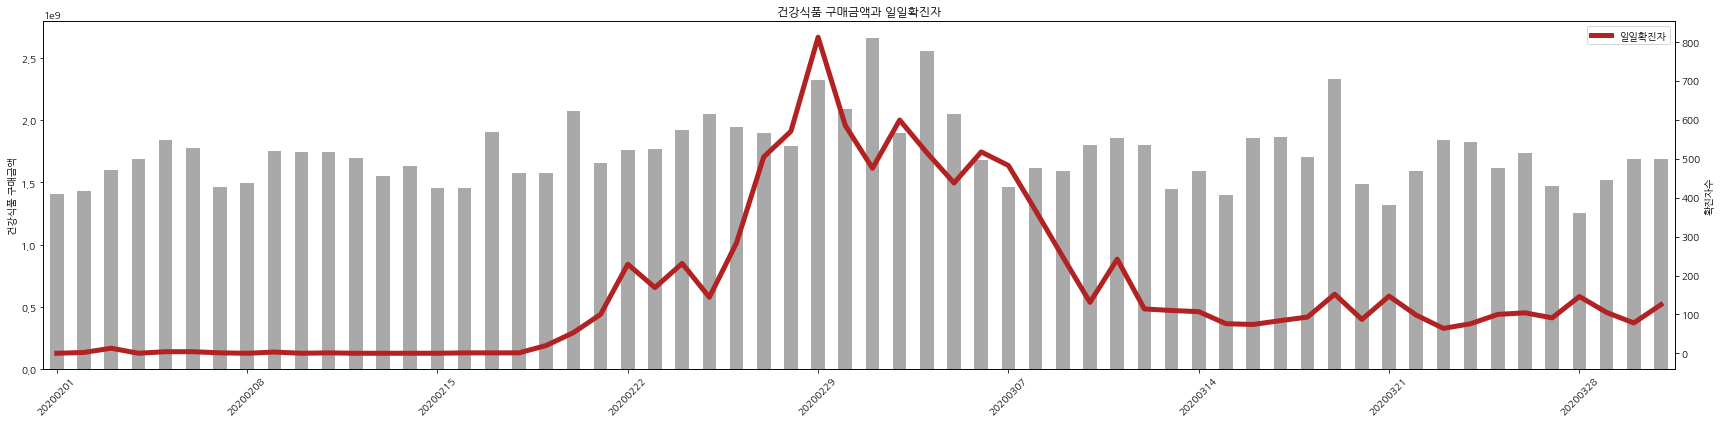

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
기타 스포츠 상관관계:  (0.3140315169770429, 0.01454685155937025)


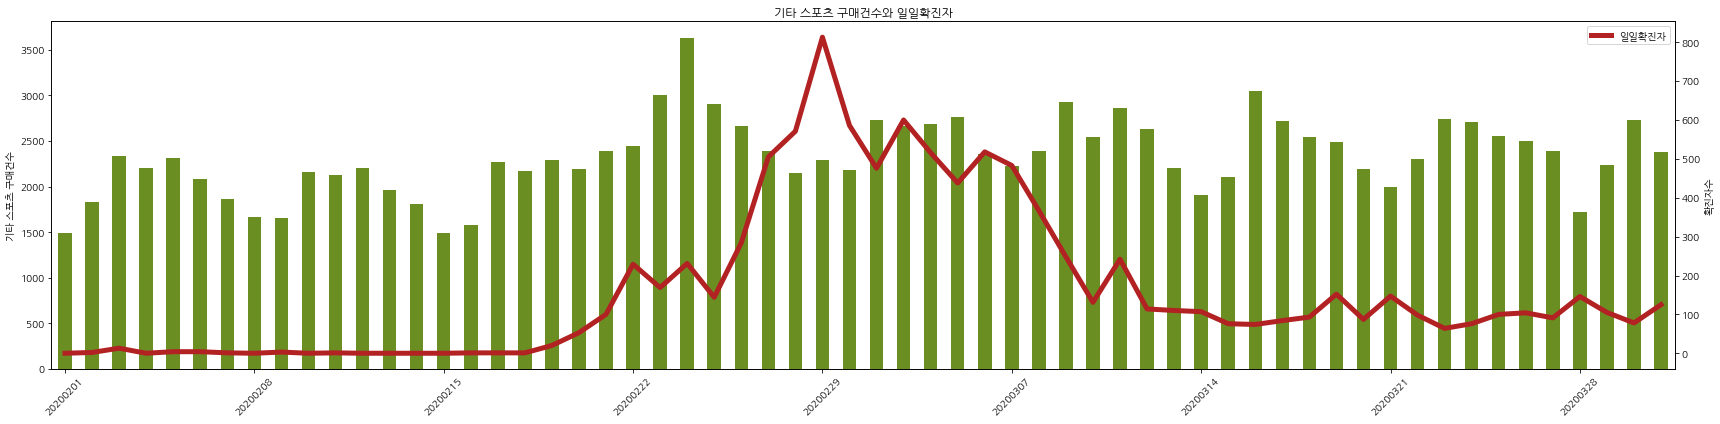

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
기타 스포츠 상관관계:  (0.11632953328779591, 0.3760812114166904)


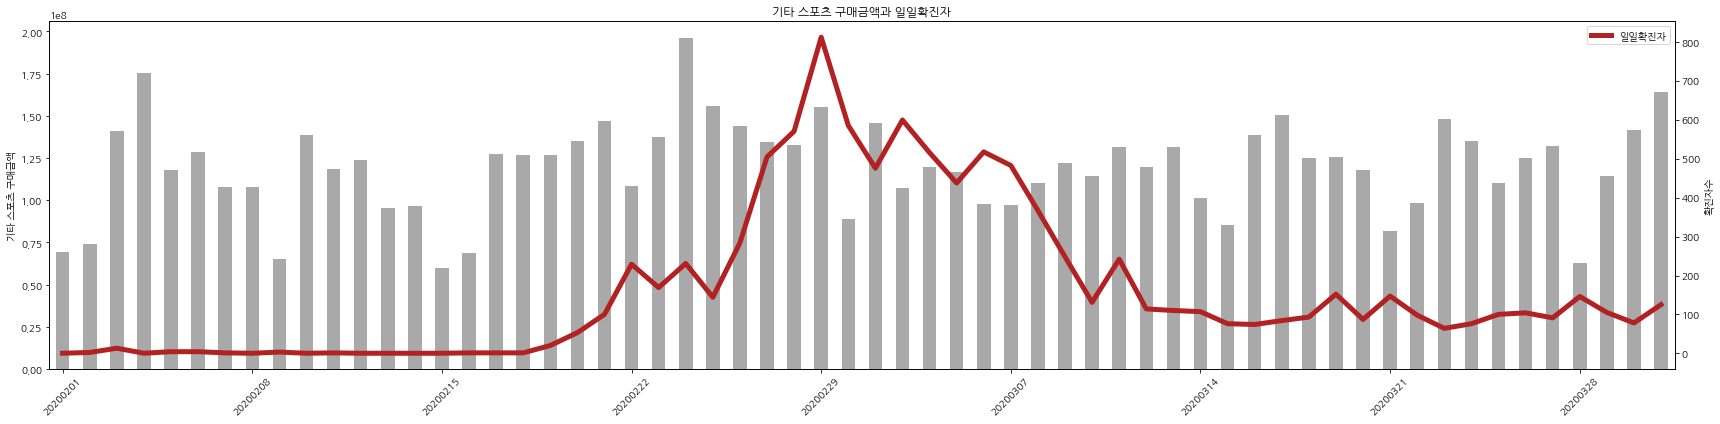

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
남성의류 상관관계:  (0.25799954943897135, 0.04656330755995754)


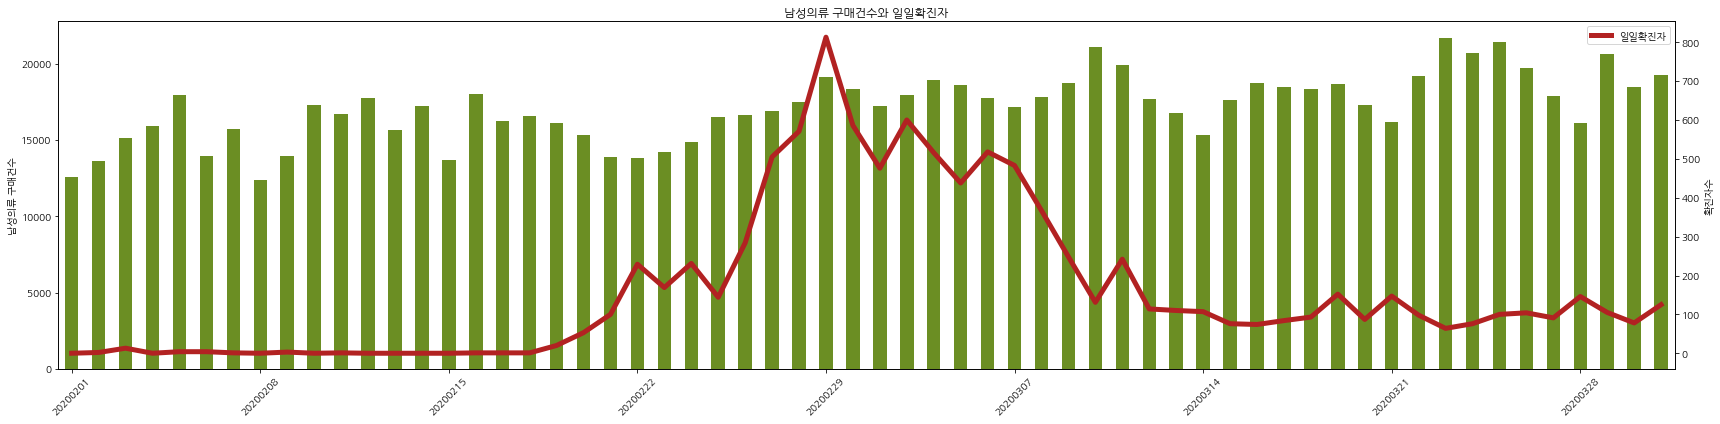

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
남성의류 상관관계:  (0.2932150697103698, 0.022985047165755515)


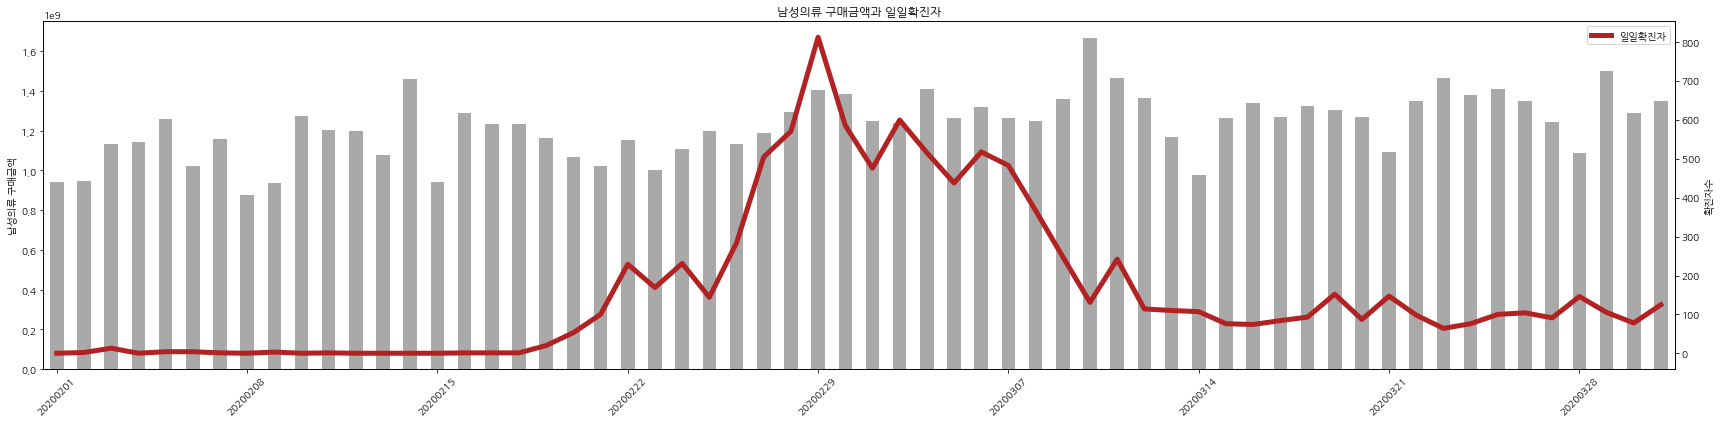

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
계절가전 상관관계:  (0.47553655894465896, 0.00012314724678655464)


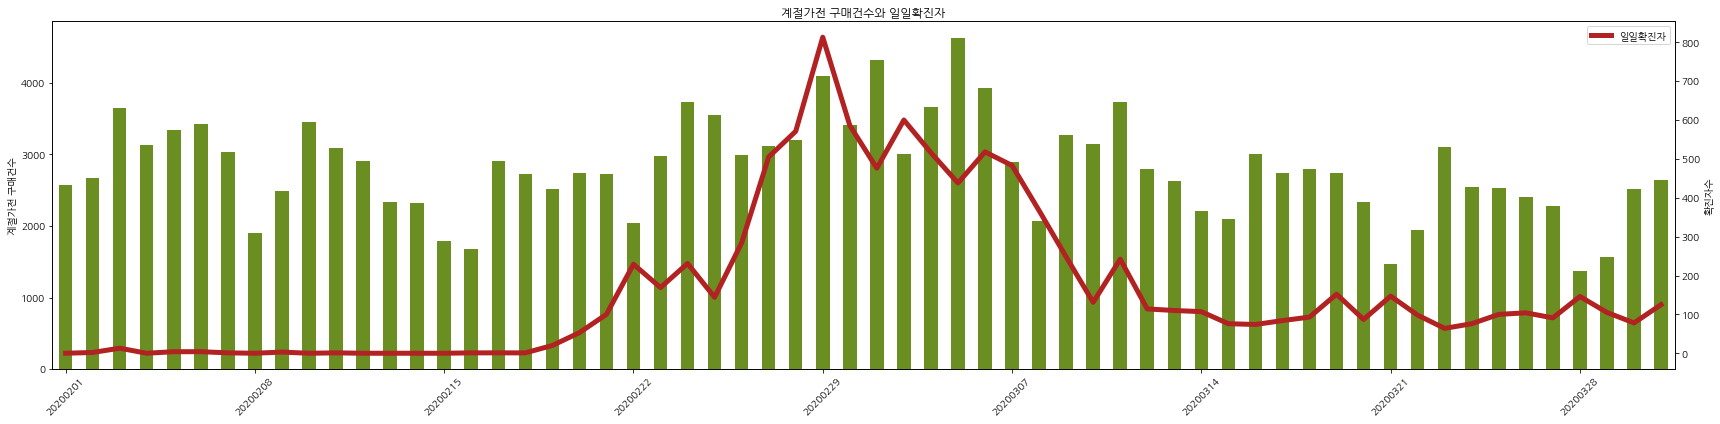

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
계절가전 상관관계:  (0.41598173363620555, 0.0009477734875016109)


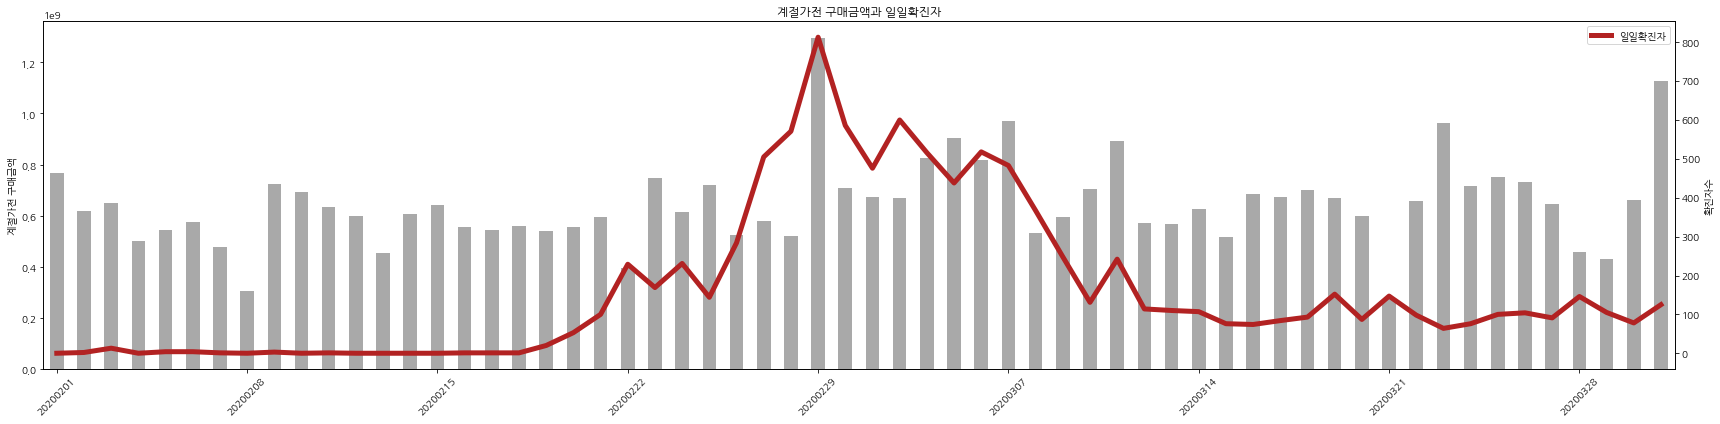

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
농축수산물 상관관계:  (0.47236233078855294, 0.00013863167348674557)


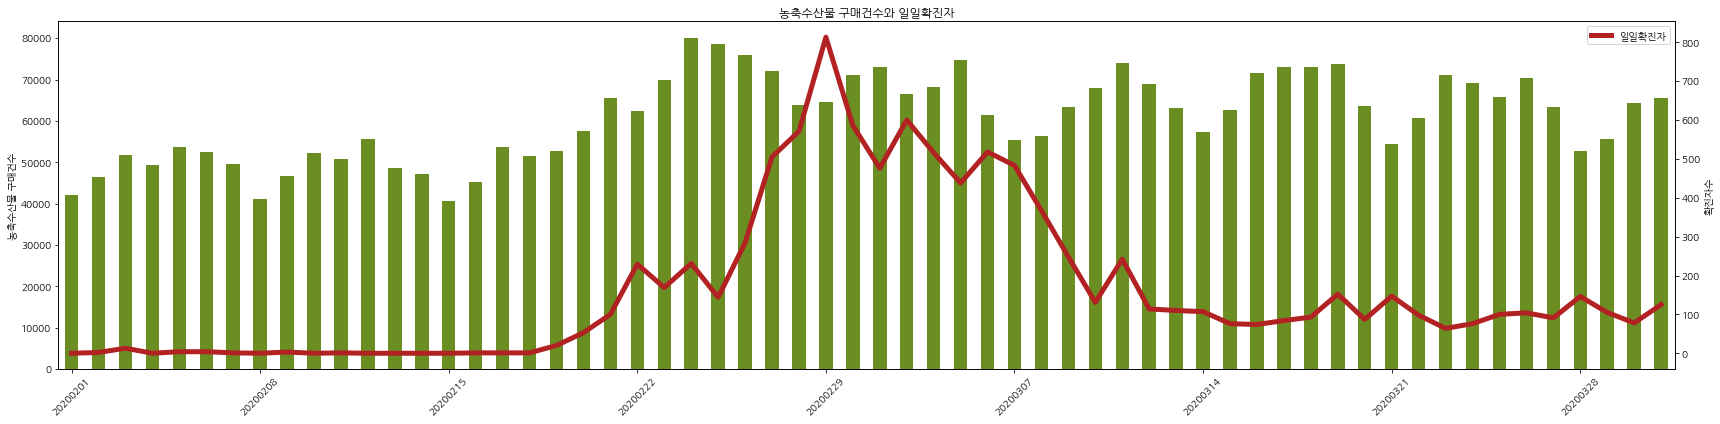

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
농축수산물 상관관계:  (0.4416397320763416, 0.0004117308910142188)


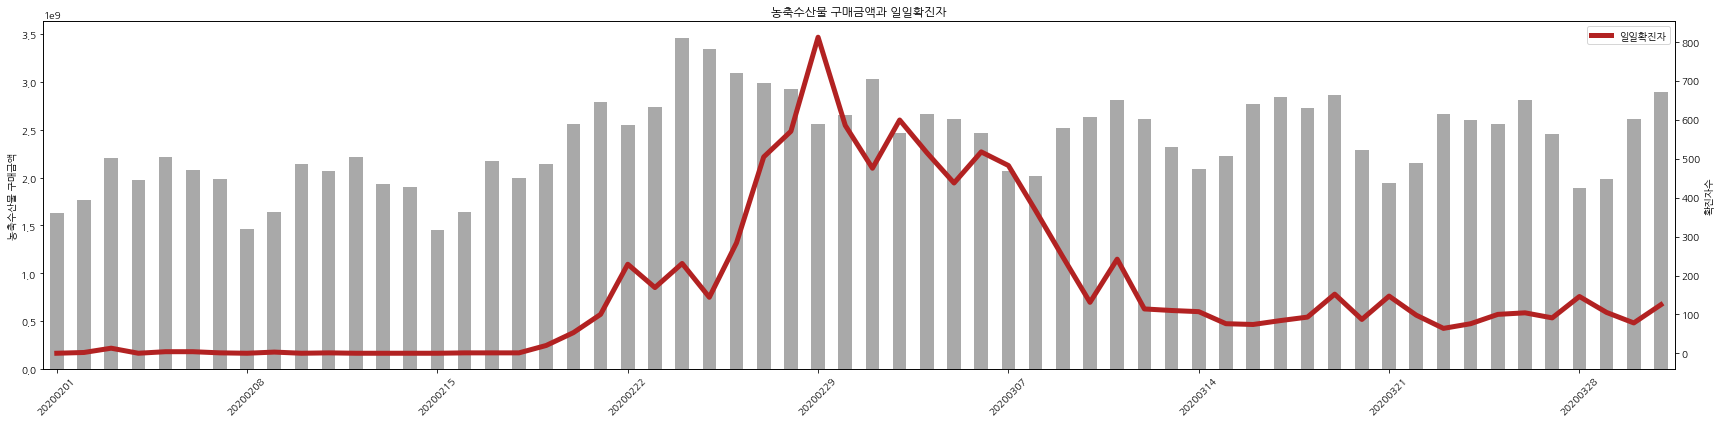

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
생활용품 상관관계:  (0.42406572664749514, 0.0007339672414400296)


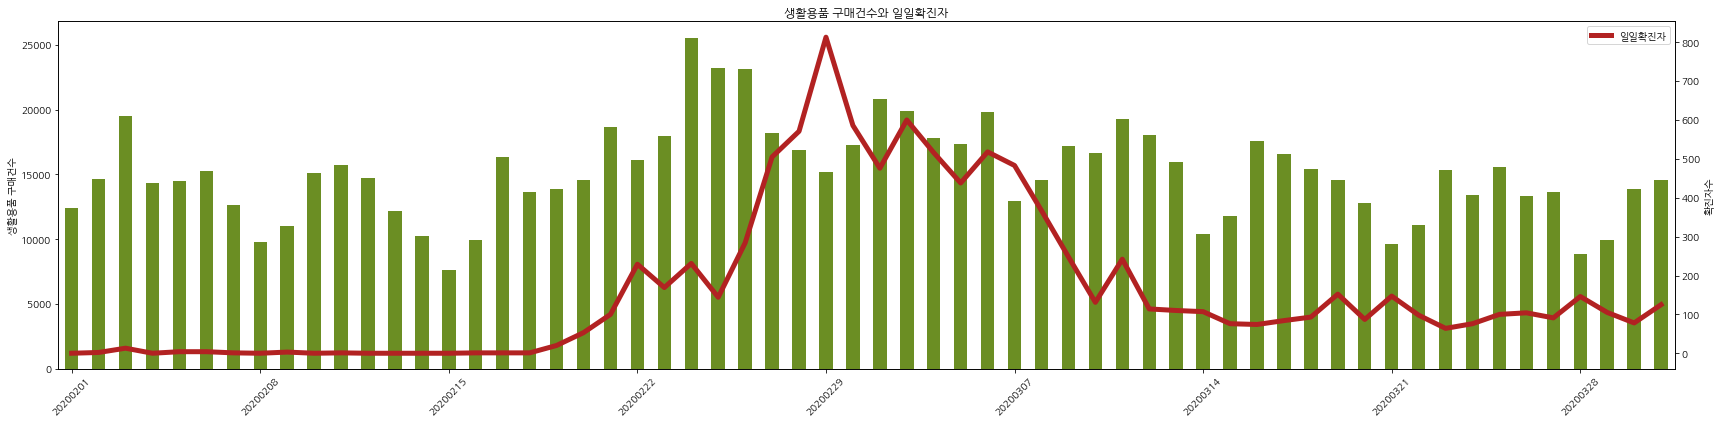

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**************************************************
생활용품 상관관계:  (0.2583385508065515, 0.04626599415300121)


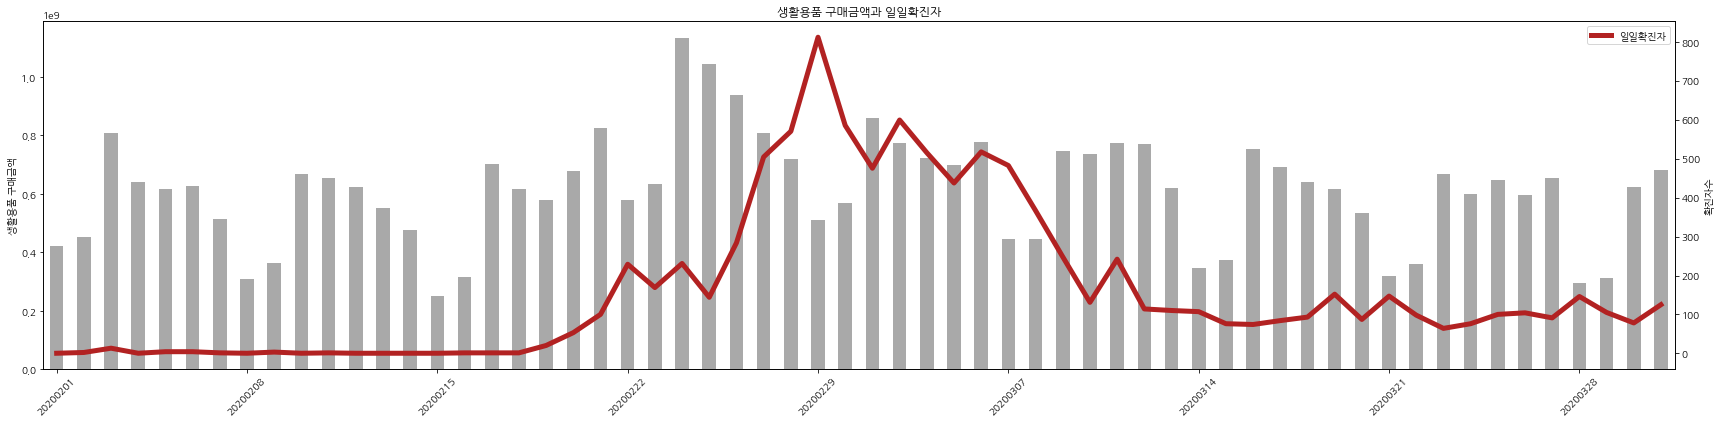

In [123]:
categories = ['가공식품','건강식품','기타 스포츠','남성의류','계절가전','농축수산물','생활용품']
for category in categories:
  corona_mcorp_plot(category, 20200201, 20200331)
  corona_mcorp_plot_won(category, 20200201, 20200331)

#### 시각화 참고

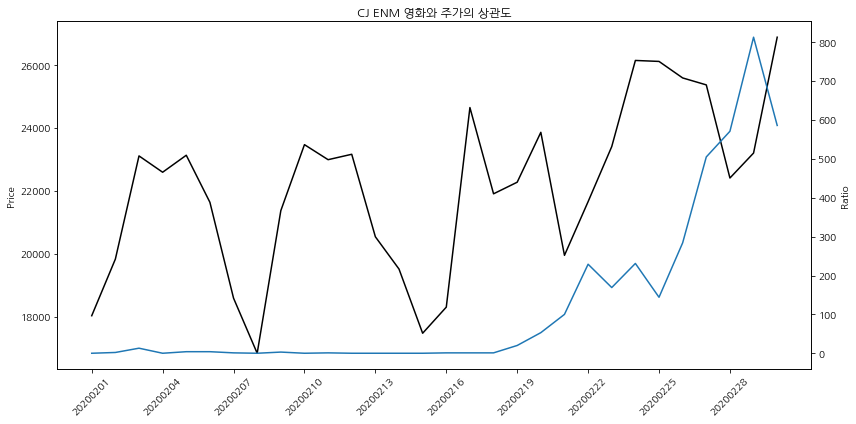

In [ ]:
xtic = np.arange(0,len(df.index),step=3)  # 인터벌 생성
xdays = [df.index[i] for i in xtic]

plt.rcParams["figure.figsize"]=(12,6)
fig, ax1 = plt.subplots()
plt.xticks(xtic,xdays,rotation=45)

ax1.plot(df_new['구매수'], color='k')
ax1.set_ylabel("Price")

ax2  = ax1.twinx()
ax2.set_ylabel("Ratio")
df_new['일일확진자'].plot(ax=ax2)
plt.title("CJ ENM 영화와 주가의 상관도")
fig.tight_layout()
plt.show()

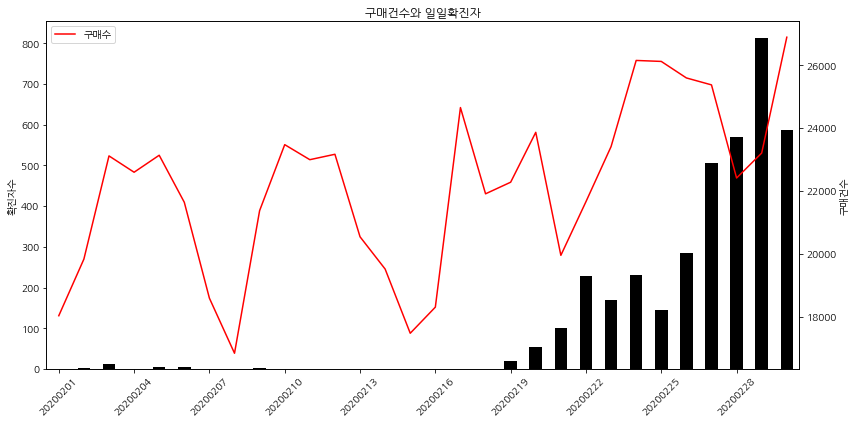

In [ ]:
xtic = np.arange(0,len(df_new.구매날짜),step=3)  # 인터벌 생성
xdays = [df_new.구매날짜[i] for i in xtic]

plt.rcParams["figure.figsize"]=(12,6)
fig, ax1 = plt.subplots()

df_new['일일확진자'].plot(kind='bar', color='k', ax=ax1)
ax1.set_ylabel("확진자수")

ax2  = ax1.twinx()
ax2.set_ylabel("구매건수")
df_new['구매수'].plot(color='r', ax=ax2)

plt.xticks(xtic)
ax1.set_xticklabels(xdays, rotation=45)

plt.title("구매건수와 일일확진자")
fig.tight_layout()
plt.legend()
plt.show()

### 2.2. Scatter (산점도)
- x축: 확진자
- y축: 소비건수

In [59]:
sday = 20200201
eday = 20200401
step = 7
category = '신발'
def corona_mcorp_scatter(category='신발', sday=20200201, eday=20200401):
  from scipy import stats
  df = categorical_cnt(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  
  corr = stats.pearsonr(df_new.구매수, df_new.일일확진자)
  if corr[1] < 0.05:
    print("*"*50)
    print(category+" 상관관계: ", corr)

    
    plt.figure(figsize=(5,5))
    plt.scatter(df_new.일일확진자, df_new.구매수)
    plt.xlabel('일일확진자수')
    plt.ylabel('소비건수')
    plt.title(category + " 구매건수와 일일확진자")

    plt.legend()
    plt.show()

In [60]:
def corona_mcorp_scatter_won(category='신발', sday=20200201, eday=20200401):
  from scipy import stats
  df = categorical_won(category,sday,eday)
  df_corona = corona_cnt(sday, eday)
  df_new = df.merge(df_corona, how='outer', on='구매날짜')
  
  corr = stats.pearsonr(df_new.구매금액, df_new.일일확진자)
  print("*"*50)
  print(category+" 상관관계: ", corr)
 
  plt.figure(figsize=(5,5))
  plt.scatter(df_new.일일확진자, df_new.구매금액)
  plt.xlabel('일일확진자수')
  plt.ylabel('소비건수')
  plt.title(category + " 구매금액과 일일확진자")

  plt.legend()
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
가공식품 상관관계:  (0.546326076723303, 3.990180581014213e-13)


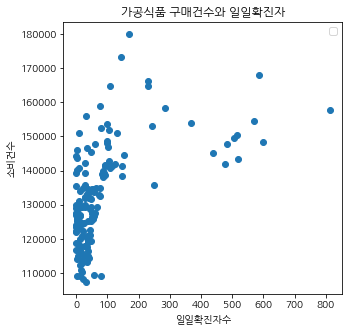

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
건강식품 상관관계:  (0.31233615210554366, 9.45015139847842e-05)


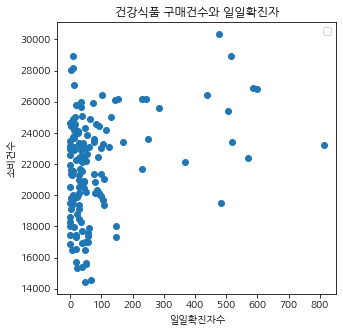

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
골프용품 상관관계:  (-0.29115620522642116, 0.00028677941522413104)


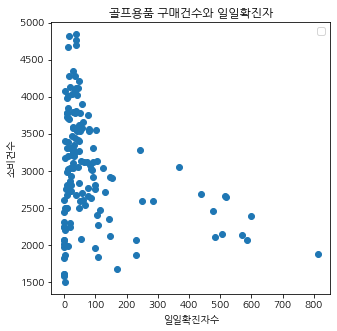

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
구기 상관관계:  (-0.17189571391666789, 0.03481767891869797)


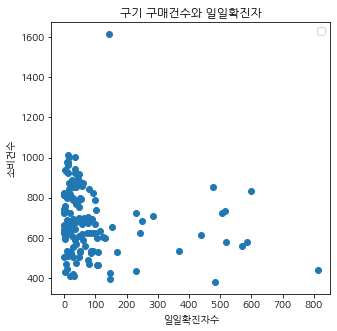

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
노트북 상관관계:  (0.2028074232763071, 0.012509362544080943)


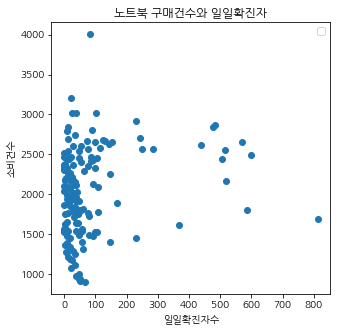

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
농축수산물 상관관계:  (0.5079812004248424, 2.779649524891991e-11)


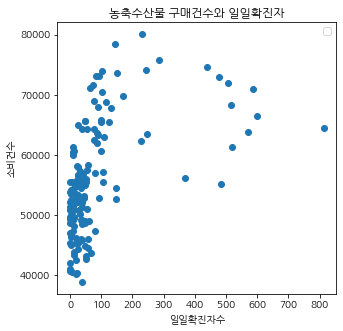

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
도서음반 상관관계:  (0.23899423943886378, 0.0031230799388040726)


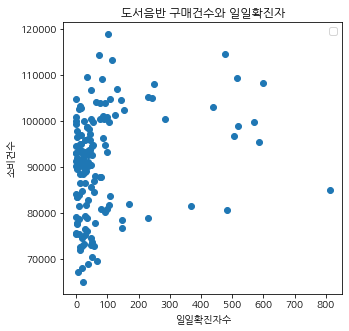

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
등산용품 상관관계:  (-0.32737222591494974, 4.077683323959799e-05)


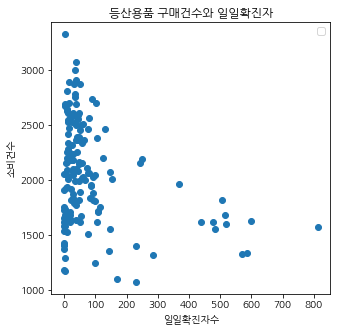

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
반려동물 상관관계:  (0.2073196929859696, 0.010642268241335585)


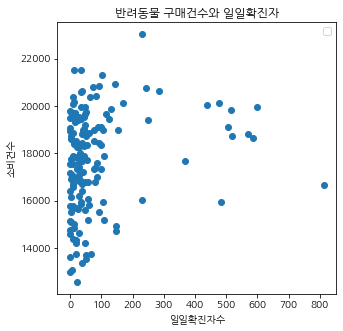

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
생활용품 상관관계:  (0.3335451832940105, 2.850403327588153e-05)


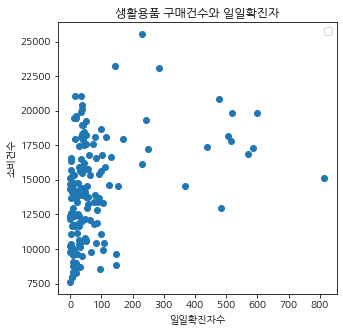

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
생활가구 상관관계:  (0.1687846311458904, 0.0382922346154071)


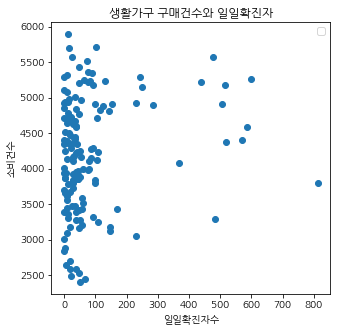

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
생활가전 상관관계:  (0.16681430363856958, 0.04064025696869047)


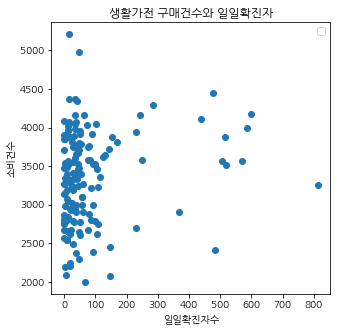

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
세탁청소세면 상관관계:  (0.4704253998721498, 1.0954863287721692e-09)


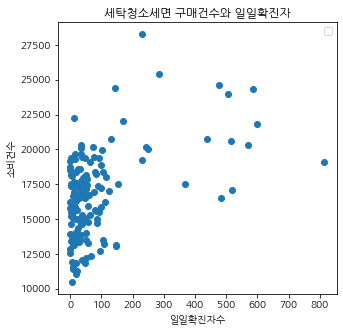

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
수납가구 상관관계:  (0.2049150773808729, 0.01160423224771685)


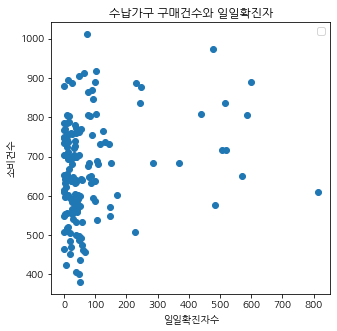

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
수영 상관관계:  (-0.25785089997148536, 0.0013914244446437516)


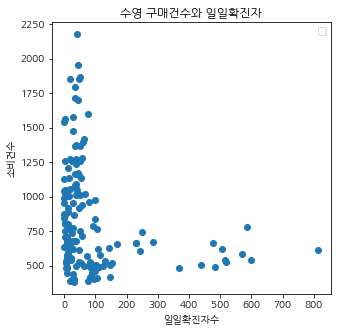

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
스킨케어 상관관계:  (0.2891607891619614, 0.00031702124141239096)


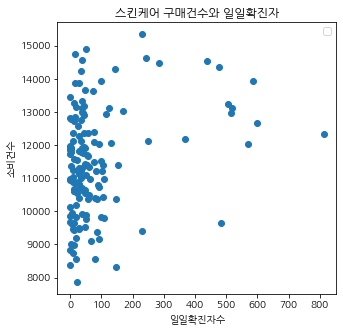

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
악세서리시계주얼리 상관관계:  (0.2820926983079476, 0.00044953769193975486)


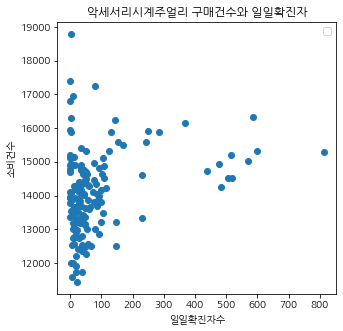

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
안전용품 상관관계:  (0.6243769288766895, 1.071495318336663e-17)


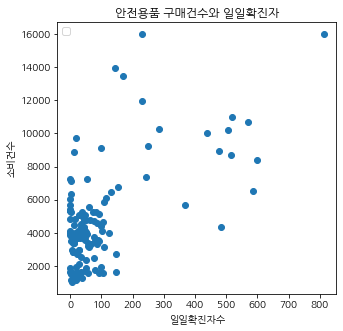

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
언더웨어 상관관계:  (-0.19545742037252437, 0.016167712389328688)


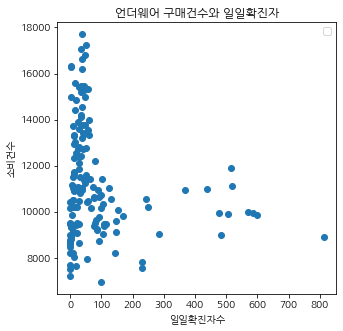

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
업소위생용품 상관관계:  (0.5773171182869373, 8.524836853760874e-15)


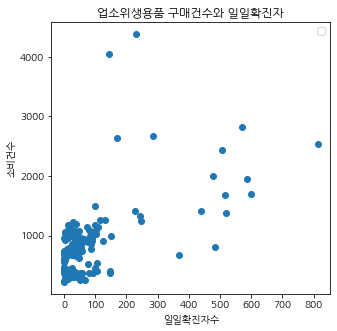

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
국내외여행 상관관계:  (-0.4007388273002395, 3.4185507986312753e-07)


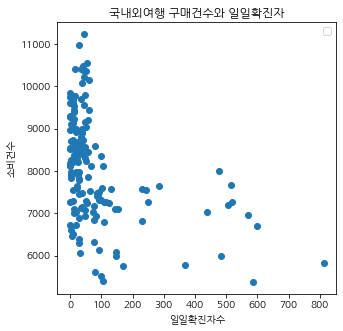

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
완구키덜트게임 상관관계:  (0.1883325090873848, 0.020569171351338556)


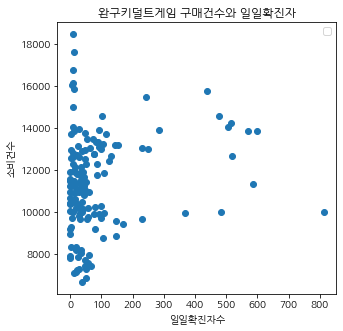

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
욕실용품 상관관계:  (0.18283919189401615, 0.0246354044933085)


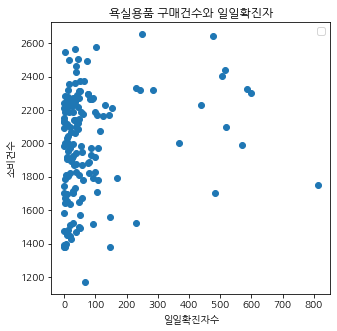

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
욕실가전 상관관계:  (0.22298357690394865, 0.005922590337875896)


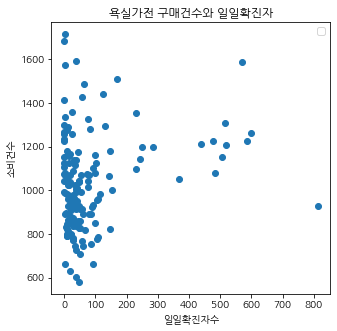

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
유아용품 상관관계:  (0.18548517920507274, 0.022598010302968354)


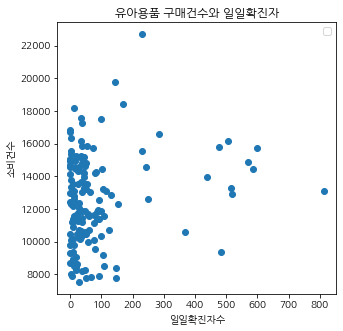

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
유아패션 상관관계:  (-0.23728789179535004, 0.0033502339130027778)


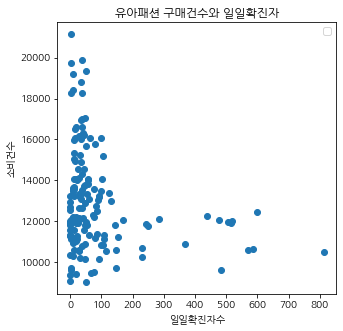

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
자전거사이클보드인라인 상관관계:  (-0.24938246604683276, 0.0020155107957935954)


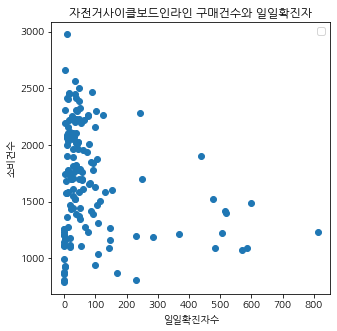

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
주방가전 상관관계:  (0.18842323208310532, 0.020507199847756098)


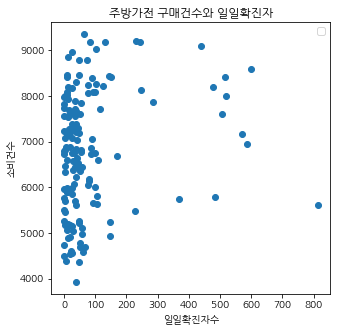

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
주방수납잡화 상관관계:  (0.24780331878132295, 0.0021567824912271144)


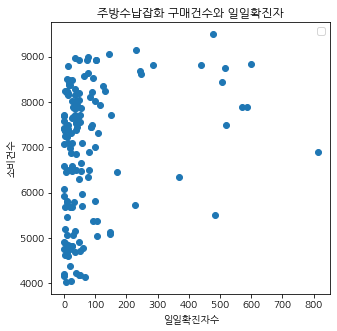

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
주방조리기구 상관관계:  (0.2343138309814615, 0.003781988893022964)


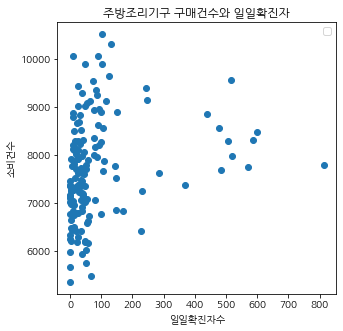

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
출산임부용품 상관관계:  (0.18635564765029963, 0.021960241316381936)


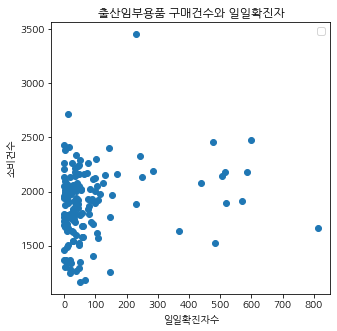

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

**************************************************
캠핑용품 상관관계:  (-0.3364670914686945, 2.3995550724404953e-05)


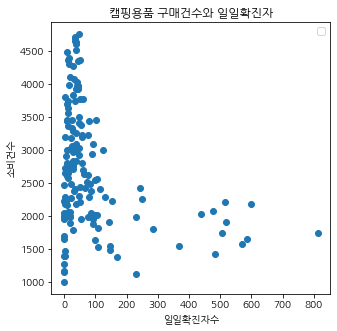

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
헤어바디용품 상관관계:  (0.5155721609715324, 1.250950387213923e-11)


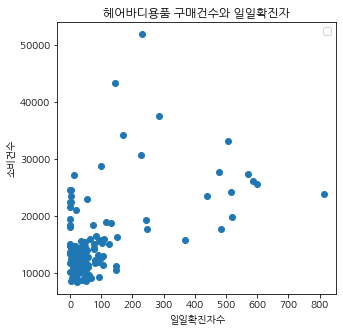

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
헬스기구용품 상관관계:  (0.41356402863530717, 1.3062766713985478e-07)


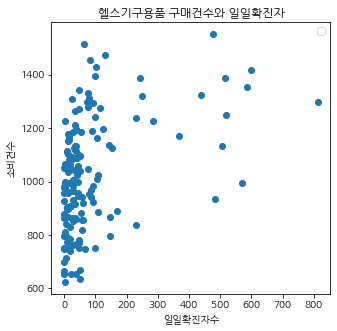

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
No handles with labels found to put in legend.


**************************************************
건강관련용품 상관관계:  (0.49952492550303895, 6.612133994509735e-11)


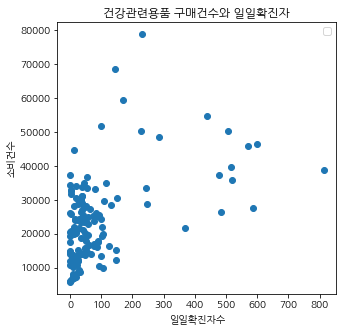

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [74]:
categories = ['가공식품','건강식품','기타 스포츠','남성의류','계절가전','농축수산물','생활용품']
for category in categories_all:
  corona_mcorp_scatter(category, 20200201, 20200630)
  # corona_mcorp_scatter_won(category, 20200201, 20200630)

- '헬스기구용품','완구키덜트게임','국내외여행',
- '헤어바디용품','건강관련용품','스킨케어',
- '가공식품','건강식품','농축수산물','주방수납잡화',
- '세탁청소세면','생활용품','계절가전',
- '안전용품','업소위생용품'